In [3]:
from sklearn.decomposition import PCA
import pandas as pd
# Load samples for demonstration
df = pd.read_csv('../saved_data/simulation_log_from_gsheet.csv', sep=',')
X = df[['yb_1','er_1','yb_2','er_2','radius']].to_numpy()
# Standardized features for PCA
autoscaled_X = (X - X.mean(axis=0)) / X.std(axis=0, ddof=1)
autoscaled_X


array([[-1.10304644, -0.9758283 , -0.9853432 , -0.84518355,  0.70349458],
       [-1.10304644, -0.9758283 , -0.97076118,  1.0563336 , -0.41711945],
       [-1.10304644, -0.9758283 , -0.95698772,  2.35435247,  1.45648791],
       ...,
       [ 1.71943255, -0.88642803, -0.82633628, -0.94152514,  0.65511544],
       [ 1.93032476, -0.95751326, -0.98813855, -0.94651841,  0.28004354],
       [ 1.92397254, -0.95544328, -0.98813855, -0.94651841,  0.28186331]])

array([0.28946218, 0.21025795])

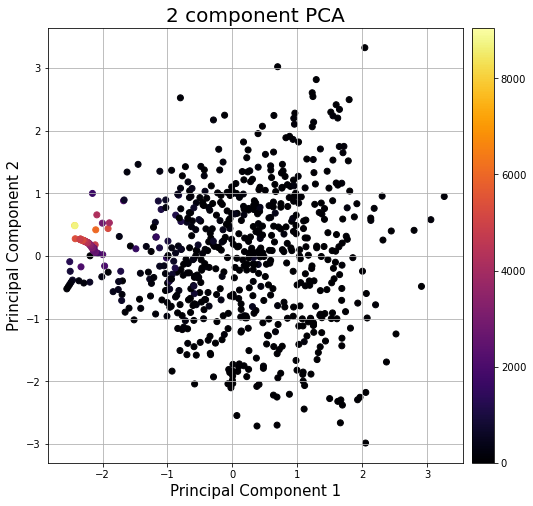

In [7]:
# Two-component PCA
from matplotlib import cm
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(autoscaled_X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

#Link UV intensity to priciple components 
finalDf = pd.concat([principalDf, df[['UV']]], axis = 1)

cmap = cm.get_cmap('inferno')
my_color=finalDf['UV']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
p=ax.scatter(finalDf['principal component 1']
               , finalDf['principal component 2'], c=my_color, cmap=cmap)
ax.grid()
plt.colorbar(p, ax=ax, fraction=0.05, pad=0.02)
# Print explained values
pca.explained_variance_ratio_

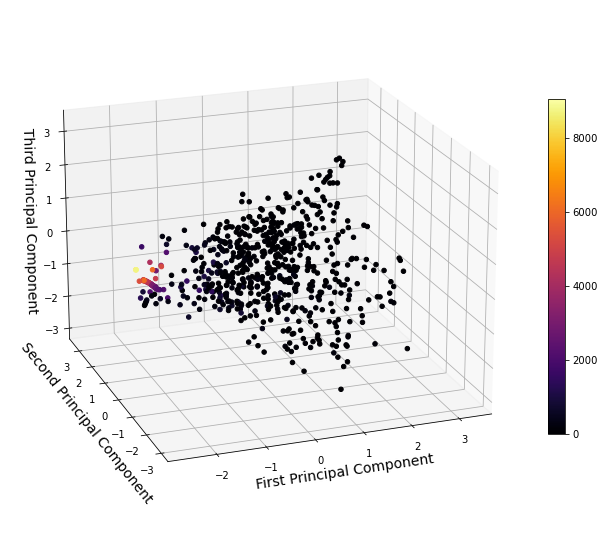

In [8]:
# Three-component PCA
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Three-component PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(autoscaled_X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
#Link UV intensity to priciple components 
finalDf = pd.concat([principalDf, df[['UV']]], axis = 1)

cmap = cm.get_cmap('inferno')
my_color=finalDf['UV']

fig,ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={'projection': '3d'})
p = ax.scatter(finalDf['principal component 1'],finalDf['principal component 2'],
               finalDf['principal component 3'], c=my_color, cmap=cmap, s=20,alpha=1)

ax.view_init(20,250)
# ax.set_xlim([0,1])
# ax.set_ylim([0,1])
# ax.set_zlim([5,34])
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)
  
plt.colorbar(p, ax=ax, fraction=0.03, pad=0.04)
plt.show()


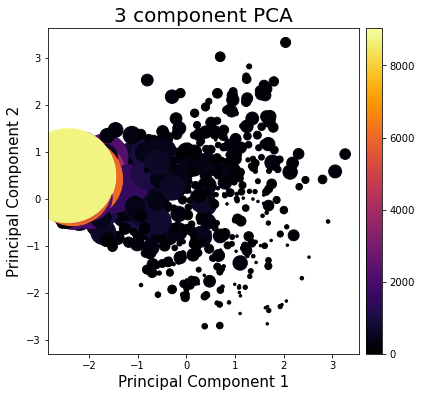

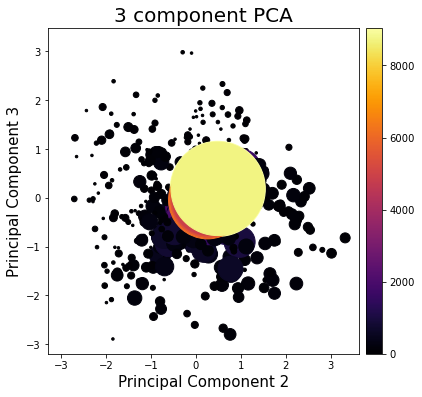

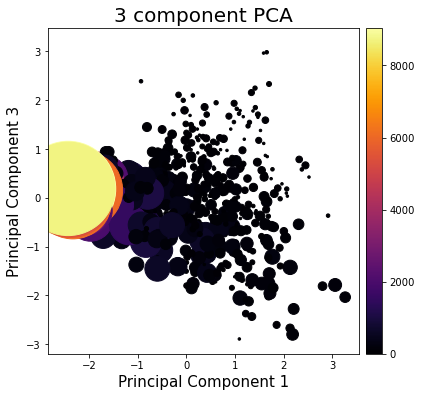

In [11]:
cmap = cm.get_cmap('inferno')
my_color=finalDf['UV']

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

p = ax.scatter(finalDf['principal component 1']
               , finalDf['principal component 2'], c=my_color, cmap=cmap, s=my_color)
plt.colorbar(p, ax=ax, fraction=0.05, pad=0.02)

from matplotlib import cm

cmap = cm.get_cmap('inferno')
my_color=finalDf['UV']

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

p = ax.scatter(finalDf['principal component 2']
               , finalDf['principal component 3'], c=my_color, cmap=cmap,s=my_color)
plt.colorbar(p, ax=ax, fraction=0.05, pad=0.02)

from matplotlib import cm

cmap = cm.get_cmap('inferno')
my_color=finalDf['UV']

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

p = ax.scatter(finalDf['principal component 1']
               , finalDf['principal component 3'], c=my_color, cmap=cmap,s=my_color)
plt.colorbar(p, ax=ax, fraction=0.05, pad=0.02)